<h1> Sage 101 </h1>

Teil der Übungen sind Programmieraufgaben. Hier sind ein Paar wichtige Sachen die Sie über Sage wissen sollten. 

<h2> Struktur eines Notebooks </h2>

Ein Jupyter notebook bestheht aus 2 Arten Zellen. Normaler Text (wie dieser) steht in einer "Markdown cell". Man kann darin auch u.a. $\LaTeX$ und <b>HTML</b> benutzen.

Wichtiger aber sind "Code cells". Die nächste Zelle ist eine Code cell. Dort gibt man einen Befehl ein, und führt den aus mit Shift-Enter, oder alternativ mit dem "Run"-button oben.

In [ ]:
print('Hello world!')

Ein Jupyter notebook hat 2 input modes:

Grüner Rand bedeutet "Edit mode": für Text oder Code innerhalb einer Zelle.
Blauer Rand bedeutet "Command mode": für Notebook level commands.

Wechsle zwischen beiden mit "Enter" (Edit mode) und "Escape" (Command mode), indem du auf oder neben eine Zelle klickst (Doppelklick für Markdown cells).

Einige shortcuts im Command mode:
- Pfeiltasten: Zwischen Zellen navigieren
- Shift + enter: Zelle evaluieren (auch für Markdown cells)
- Alt + enter: Zelle evaluieren und neue Zelle einfügen
- B: neue Zelle einfügen
- M: ändere Zelle zu Markdown
- Y: ändere Zelle zu Code
- D+D: Zelle löschen
- I+I: Interrupt kernel (falls Sage hängen bleibt)
- 0+0: Restart kernel
- S: Notebook speichern 
- H: Zeige keyboard shortcuts

<h2> Basisoperationen </h2>

Sage kennt die Basisoperationen und vieles mehr:

In [ ]:
p = 2*40+11
print(p)

In [ ]:
p.factor()

In [ ]:
p==100-9

Das Zeichen = steht für einen Befehl: mache die linke Seite (eine Variable) gleich der rechten Seite (ein Wert). Vergleichungen werden mit ==, <=, <, usw. gemacht. Viele Programmierfehler kommen daher, dass man versehentlich = benutzt wo == gemeint wurde. 

"//" ist Division von ganzen Zahlen (nach unten abgerundet); "%" ist modulo:

In [ ]:
print(57//10)
print(57%10)

<h2> Hilfe </h2>

Man kann mit der Help-Option im Menü fast alles finden, was man braucht. Auch kann man mit ? Informationen über einen gewissen Befehl aufrufen:

In [ ]:
factorial?

In [ ]:
p?

Sage hat auch Tab-completion: drücke mal "Tab" auf die folgende beide Zellen.

In [ ]:
plo

In [ ]:
p.

<h2> Listen </h2>
Eine Liste kann man machen mit eckigen Klammern "[]". In einer Liste können beliebige Objekten stehen.

In [ ]:
meineListe=[1,"two",[4,5]]

Elemente einer Liste bekommt man so:

In [ ]:
meineListe[1] #Achtung: Sage fängt beim zählen immer von 0 an. 
#(Alles was im code nach "#" kommt ist Kommentar, wird nicht ausgeführt.)

Sage (oder eher: Python) kennt sehr ausführliche Operationen für Listen; ein paar Beispiele:

In [ ]:
L=[5..11] 
L

In [ ]:
[i^2 for i in L]

In [ ]:
[i for i in L if i.is_prime()]

In [ ]:
sum(L)

In [ ]:
print(L[3:6]) #Elemente 3 bis 6 (3 inklusive, 6 exclusive)
print(L[3:])
print(L[:6])

Man kann Listen zusammensetzen mit "+".

In [ ]:
L+[21,22,23]

Und z.B. "L+L+L" kann man abkürzen zu:

In [ ]:
3*L

Die oben verwendenten Operationen ändern die Liste L nicht; sie produzieren eine neue Liste.
Hier sind einige Operationen die L ändern:

In [ ]:
L.append(12) 
print(L)

In [ ]:
L.insert(5,42)
print(L)

In [ ]:
L.pop(2)
print(L)

<h2> Dicts </h2>
Ein dict (von "dictionary": "Worterbuch") ist wie eine Liste, aber die Indizes können beliebige Objekte sein.

Dicts wirden mit Akkoladen "{}" dargestellt:

In [ ]:
D = {'Apfel':'apple','Birne':'pear','Ananas':'pineapple',1:'one'}

In [ ]:
D['Ananas']

In [ ]:
D

In [ ]:
D.keys()

In [ ]:
D.values()

In [ ]:
'Birne' in D

In [ ]:
'pear' in D #Also "in" überprüft ob etwas ein "key" vom Dict ist.

<h2> Schleifen </h2>

Achtung: Einrückungen sind wichtig in Sage/Python!

For loop:

In [ ]:
a=0
for i in range(100): 
    a=a+i
print(a)

In [ ]:
for i in L:
    print(i^i)

While loop:

In [ ]:
i=90
while not is_prime(i):
    i = i+1
print(i)

If-else:

In [ ]:
a=randint(0,10)
if a <= 5:
    print(a)
else:
    print(-a)

<h2>Funktionen</h2>

Die Argumente einer Funktion werden immer zwischen runden Klammern geschrieben:

In [ ]:
factorial(100)

Man kann selber Funktionen definieren mit "def". Dies definiert z.B. die Fibonaccizahlen:

In [1]:
def F(n):
    if n == 0 or n==1:
        return 1
    else:
        return F(n-1)+F(n-2)

To test how long it takes to evaluate a function, you can use the following function. You can use this as a black box; just copy-paste it into any notebook where you want to do a timing test.

In [2]:
#Input: (f,r), where:
#f is the function you want to test (between quotation marks),
#r is the list of inputs you want to test it on.
#Output: a list of times in seconds.
#Also displays a plot of this list.
from sage.misc.sage_timeit import sage_timeit
def my_timeit(f,r):
    for i in r:
        L=flatten([sage_timeit(f+'('+str(i)+')', globals(), preparse=True, number=1, repeat=1).series for i in r])
        list_plot(L).show()
        return L

Wann wir dies auf F anwenden, sehen wir dass die Definition nicht sehr effizient ist.

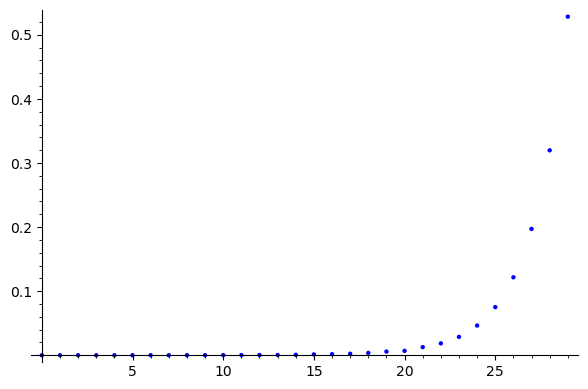

In [3]:
my_timeit('F',range(30));

Was ist der Grund? Wenn F(n) ausgerechnet werden muss, werden F(n-1) und F(n-2) gebraucht, und die Funktion F wird zwei mal aufgerufen. Um F(n-1) auszurechnen, wird u.a. wieder F(n-2) gebraucht, und nicht benutzt, dass man F(n-2) schon mal ausgerechnet hat. Genauer gesagt: die Anzahl Mal, dass die Funktion F aufgerufen wird um F(n) zu berechnen erfuellt die gleiche Rekurrenz die F. Nicht gut. So werden früher berechnete Werte gespeichert, und nicht immer wieder berechnet:

In [4]:
D={}
def G(n):
    if n in D:
        return D[n]
    else:
        if n == 0 or n==1:
            result = 1
        else:
            result = G(n-1)+G(n-2)
        D[n] = result
    return result

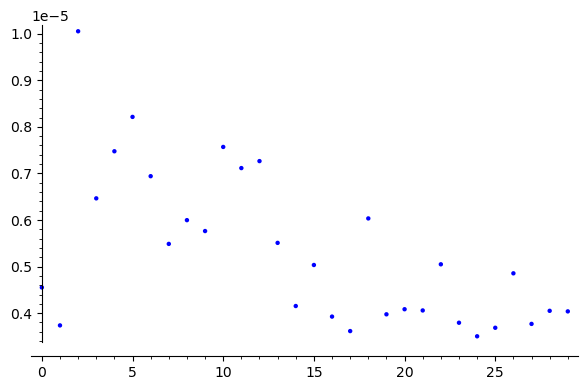

In [5]:
my_timeit('G',range(30));